# STINTSY Project - 

### Group 4 (S13)
CAPAROS, MIGUEL ANTONIO <br> 
MARTINEZ, AZELIAH <br>
PAREDES, BILL JETHRO <br>
VILLANUEVA, KEISHA LEIGH <br>

# I. Introduction to the problem and dataset

Select one real-world dataset from the list of datasets provided for the project. Each dataset is accompanied with a description file, which also contains detailed description of each feature.

The target task (i.e., classification or regression) should be properly stated as well.

The Labor Force Survey (LFS) is a nationwide quarterly survey conducted by the Philippine Statistics Authority (PSA). It aims to gather data on the demographic and socio-economic characteristics of the labor force, providing insights into employment, unemployment, and underemployment trends in the country.

# II. Description of the dataset

The Labor Force Survey (LFS) is a nationwide survey of households conducted quarterly to gather data on the demographic and socio-economic characteristics of the population. It is primarily geared towards the estimation of the levels of employment and unemployment in the country. One of the objectives of the Labor Force Survey is to provide a quantitative framework for the preparation of plans and formulation of policies affecting the labor market. Specifically, the survey is designed to provide statistics on levels and trends of employment, unemployment and underemployment of the country, as a whole, and for the 17 administrative regions. (PSA, 2021)

## Dataset Overview

The Labor Force Survey (LFS) dataset contains information on individuals' demographic profiles, educational attainment, occupation types, work status, and income levels. 

## Data Collection Process

The PSA collects the LFS data through quarterly household surveys using face-to-face interviews. The survey employs a multi-stage sampling design to ensure that the sample accurately represents the population. The key steps in the data collection process include:

1. Sampling frame creation: The PSA uses a master sample list derived from the 2015 Census of Population and Housing (CPH) as the sampling frame.
2. Random selection of households: Households are randomly selected within each stratum (region or province) to create a representative sample.
3. Face-to-face interviews: Field interviewers visit the sampled households and collect data through structured questionnaires.
4. Data validation and processing: The collected data undergoes validation and consistency checks before being aggregated and published.

The multi-stage sampling design of the Labor Force Survey (LFS) ensures representativeness across regions, but certain limitations exist. Non-response rates and inaccuracies in self-reported data may introduce bias, particularly in income-related features. Since the survey is conducted quarterly, it captures seasonal employment trends, which may affect the generalizability of insights over longer periods. Additionally, recall bias or misreporting could impact data reliability. Despite these limitations, the LFS remains a valuable source for policy-making and labor market analysis, providing key insights into the employment landscape of the Philippines.

## Dataset Structure

### Overview
The dataset is organized into two main sections:
- **ID Items (_IDS0)** - Metadata and household identifiers
- **Household Members (HHMEM)** - Individual member data with **demographic, education, and employment** details.

### Rows and Columns
Each **row** represents a *household member* (not an entire household). I.E. if a household has 5 people, there will be 5 rows for that household.
Each **column** represents a specific feature (e.g. age, sex, occupation).

### Feature Breakdown
- **_IDS0 section:** 4 columns
- **HHMEM section:** 43 columns

The total feature count then comes out to **47**.

### File Setup
The dataset consists of two main files: a single CSV file that contains all of the data, and an Excel worksheet that serves as a dictionary that defines each column as well as possible values of each column.
- **LFS PUF April 2016.csv**
- **lfs_april_2016_metadata(dictionary).xlsx**

Since all of the data is in the CSV file, combination of files will not be required. The metadata file will instead serve as a reference as we work and process the data.


## Dataset Features

Besides the two main sections of the dataset, the columns under the **HHMEM** section can also be grouped further. For better readability and easier understanding, the overview of the features below will be used in discussing the features:

**_IDS0 section**
- Household-level identifiers
  
**HHMEM section**
- Demographics
- Member-specific Information
- Education Details
- Work and Employment Details
- Underemployment and Job Search Details
- Job Search and Availability Details
- Previous Job Info

### Feature Discussion


#### I. ID Items (_IDS0)
This section contains household-level identifiers — essential for merging data across files or aggregating results.
| **Feature** | **Description**                                                                                                                                        |
| ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `PUFREG`    | Region code — identifies the region where the household is located. Typically follows a national coding system (e.g., 01 for NCR, 02 for Region II).   |
| `PUFPRV`    | Province code — identifies the specific province within the region.                                                                                    |
| `PUFPRRCD`  | Province recode — an adjusted province code for analysis, especially if some provinces are grouped or reclassified for privacy or statistical reasons. |
| `PUFHHNUM`  | Household Unique Sequential Number — a unique identifier assigned to each household. Used to link with the `HHMEM` section (household members).        |

---



#### II. Household Members (HHMEM)

 **Demographics**
|**Feature**|**Description**|
|---|---|
|`PUFURB2K10`|Urban-Rural Classification (2010) — indicates whether the household is located in an urban or rural area (based on 2010 census definitions).|
|`PUFPWGTFIN`|Final Weight — a statistical weight assigned to this observation, based on provincial population projections. Important for making survey results representative.|
|`PUFSVYMO`|Survey Month — the month when the survey was conducted.|
|`PUFSVYYR`|Survey Year — the year when the survey was conducted.|
|`PUFPSU`|Primary Sampling Unit Number — identifies the cluster or sampling unit to which this household belongs, used for stratified sampling analysis.|
|`PUFRPL`|Replicate Number — identifies the replicate group used in variance estimation for more accurate statistical analysis.|
|`PUFHHSIZE`|Household Size — total number of members in the household.|

---

 **Member-specific Information**

|**Feature**|**Description**|
|---|---|
|`PUFC01_LNO`|Line Number — unique number identifying each individual within the household.|
|`PUFC03_REL`|Relationship to Household Head — coded to indicate the person’s relationship to the head (e.g., 01 = Head, 02 = Spouse, 03 = Child, etc.).|
|`PUFC04_SEX`|Sex — 1 for male, 2 for female.|
|`PUFC05_AGE`|Age — age in years as of the last birthday.|
|`PUFC06_MSTAT`|Marital Status — coded (e.g., 1 = Single, 2 = Married, 3 = Widowed, etc.).|

---

**Education Details**

|**Feature**|**Description**|
|---|---|
|`PUFC07_GRADE`|Highest Grade Completed — coded based on education level (e.g., 0 = No schooling, 6 = Elementary graduate, 10 = College graduate, etc.).|
|`PUFC08_CURSCH`|Currently Attending School — 1 if currently enrolled, 2 if not.|
|`PUFC09_GRADTECH`|Graduate of Technical/Vocational Course — indicates if the person has completed a vocational course (1 = Yes, 2 = No).|

---


**Work and Employment Details**

|**Feature**|**Description**|
|---|---|
|`PUFC10_CONWR`|Overseas Filipino Indicator — identifies if the person is an overseas Filipino worker (1 = Yes, 2 = No).|
|`PUFC11_WORK`|Work Indicator — whether the person worked at least one hour for pay or profit in the past week (1 = Yes, 2 = No).|
|`PUFC12_JOB`|Job Indicator — whether the person had a job or business but did not work due to reasons like sickness or vacation (1 = Yes, 2 = No).|
|`PUFC14_PROCC`|Primary Occupation Code — categorizes the person’s main job (e.g., 1 = Farmers, 2 = Teachers, etc.).|
|`PUFC16_PKB`|Kind of Business — describes the type of industry the person works in (e.g., Manufacturing, Agriculture, Services).|
|`PUFC17_NATEM`|Nature of Employment — indicates whether the job is permanent, temporary, seasonal, or other.|
|`PUFC18_PNWHRS`|Normal Working Hours per Day — usual number of hours worked in a day.|
|`PUFC19_PHOURS`|Total Hours Worked — number of hours worked during the past week across all jobs.|

---

**Underemployment and Job Search Details**

|**Feature**|**Description**|
|---|---|
|`PUFC20_PWMORE`|Want More Hours — indicates whether the person wants to work more hours (1 = Yes, 2 = No).|
|`PUFC21_PLADDW`|Look for Additional Work — 1 if they looked for extra work, 2 if not.|
|`PUFC22_PFWRK`|First Time to Work — 1 if this is their first job ever.|
|`PUFC23_PCLASS`|Class of Worker — identifies if they’re self-employed, a government worker, or a private employee.|
|`PUFC24_PBASIS`|Basis of Payment — indicates if they are paid daily, weekly, monthly, or by commission.|
|`PUFC25_PBASIC`|Basic Pay per Day — daily wage in local currency (if applicable).|
|`PUFC26_OJOB`|Other Job Indicator — indicates if they have a secondary job.|
|`PUFC27_NJOBS`|Number of Jobs — total number of jobs held during the past week.|
|`PUFC28_THOURS`|Total Hours Worked for All Jobs — cumulative hours from all jobs.|

---

**Job Search and Availability Details**

|**Feature**|**Description**|
|---|---|
|`PUFC29_WWM48H`|Reason for Working More than 48 Hours — coded list of reasons (e.g., Wanted more earnings, Requirements of the job, etc.).|
|`PUFC30_LOOKW`|Looked for Work — indicates if they actively sought work in the past week.|
|`PUFC31_FLWRK`|First Time to Look for Work — 1 if this is their first job search.|
|`PUFC32_JOBSM`|Job Search Method — coded for types of job search (e.g., referrals, online, walk-ins).|
|`PUFC33_WEEKS`|Number of Weeks Spent Looking — duration of job search in weeks.|
|`PUFC34_WYNOT`|Reason for Not Looking for Work — coded reasons (e.g., waiting for results, illness).|
|`PUFC35_LTLOOKW`|When Last Looked for Work — coded timeframe (e.g., within last month, last year).|
|`PUFC36_AVAIL`|Available for Work — whether the person is available to start working immediately.|
|`PUFC37_WILLING`|Willing to Work — whether the person is willing to accept a job in the next two weeks.|

---

**Previous Job Info**

|**Feature**|**Description**|
|---|---|
|`PUFC38_PREVJOB`|Previous Job Indicator — 1 if they had a job before the current one.|
|`PUFC40_POCC`|Previous Occupation — code for their last job type.|
|`PUFC41_WQTR`|Did Work Last Quarter — checks if they worked last quarter.|
|`PUFC43_QKB`|Kind of Business (Past Quarter) — business type for their previous job.|
|`PUFNEWEMPSTAT`|New Employment Criteria (July 2005) — new coding reflecting updated employment criteria.|

---

### Metadata Valueset 
Most features of the dataset have a coded list of values defined in the metadata file (e.g. **PUFC03_REL_VS1** has 1 for Head, 2 for Wife/Spouse, 3 for Son/Daughter, etc.). Some of the values were included in the feature discussion above. In the interest of time and readability, coded values will be defined as needed in the discussion.

## ^^ i added the last part for now but in case we have extra time might be good to discuss all of them din

# III. List of requirements

List all the Python libraries and modules that you used.

## Import Libraries

add here

In [11]:
# Data Manipulation 
import random
import numpy as np
import pandas as pd  
import pickle
import os
import matplotlib.pyplot as plt

# Visualization
import matplotlib.pyplot as plt     # For creating plots and visualizations

# Makes matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

import seaborn as sns   

# IV.  Data preprocessing and cleaning

Perform necessary steps before using the data. In this section of the notebook, please take note of the following:

• If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification for the use of each preprocessing technique used in the project.

• Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There should be a correct and proper justification for the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study.

## Reading the Dataset

Our first step is to load the dataset using pandas, which will import the data into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to accomplish this.

In [12]:
laborforce_df = pd.read_csv('Labor Force Survey 2016.csv')

When loading a new dataset, it is advisable to utilize the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, as it displays general information regarding the dataset's structure and attributes.

In [13]:
laborforce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

We will use the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) function to quickly view the first few rows of our dataset.

In [14]:
laborforce_df.head()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


## Handling Missing Data

Detecting and managing missing values is crucial for data analysis. To identify missing data within our DataFrame, we will use the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) function in combination with [`sum`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html). This approach allows us to understand the extent of missing values in each column, facilitating appropriate strategies for data cleaning and preprocessing.

In [15]:

laborforce_df['PUFC11_WORK'] = laborforce_df['PUFC11_WORK'].replace(' ', np.nan)

missing_data = laborforce_df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 PUFREG                 0
PUFPRV                 0
PUFPRRCD               0
PUFHHNUM               0
PUFURB2K10             0
PUFPWGTFIN             0
PUFSVYMO               0
PUFSVYYR               0
PUFPSU                 0
PUFRPL                 0
PUFHHSIZE              0
PUFC01_LNO             0
PUFC03_REL             0
PUFC04_SEX             0
PUFC05_AGE             0
PUFC06_MSTAT           0
PUFC07_GRADE           0
PUFC08_CURSCH          0
PUFC09_GRADTECH        0
PUFC10_CONWR           0
PUFC11_WORK        21894
PUFC12_JOB             0
PUFC14_PROCC           0
PUFC16_PKB             0
PUFC17_NATEM           0
PUFC18_PNWHRS          0
PUFC19_PHOURS          0
PUFC20_PWMORE          0
PUFC21_PLADDW          0
PUFC22_PFWRK           0
PUFC23_PCLASS          0
PUFC24_PBASIS          0
PUFC25_PBASIC          0
PUFC26_OJOB            0
PUFC27_NJOBS           0
PUFC28_THOURS          0
PUFC29_WWM48H          0
PUFC30_LOOKW           0
PUFC31_FLWRK           0
PUFC32_JOB

# V. Exploratory data analysis

Perform exploratory data analysis comprehensively to gain a good understanding of your dataset. In this section of the notebook, you must present relevant numerical summaries and visualizations. Make sure that each code is accompanied by a brief explanation. The whole process should be supported with verbose textual descriptions of your procedures and findings.

## Demographics

### Univariate Analysis: Age Distribution

Understanding the distribution of individual variables is fundamental in Exploratory Data Analysis (EDA). In this section, we will analyze the age distribution of respondents using the PUFC05_AGE column. To visualize the spread and frequency of different age groups, we will employ a histogram plot. This approach provides clear insights into the central tendency, dispersion, and potential outliers within the dataset, allowing us to identify any notable patterns or irregularities.
We will use the [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function from the Seaborn library to generate the histogram.

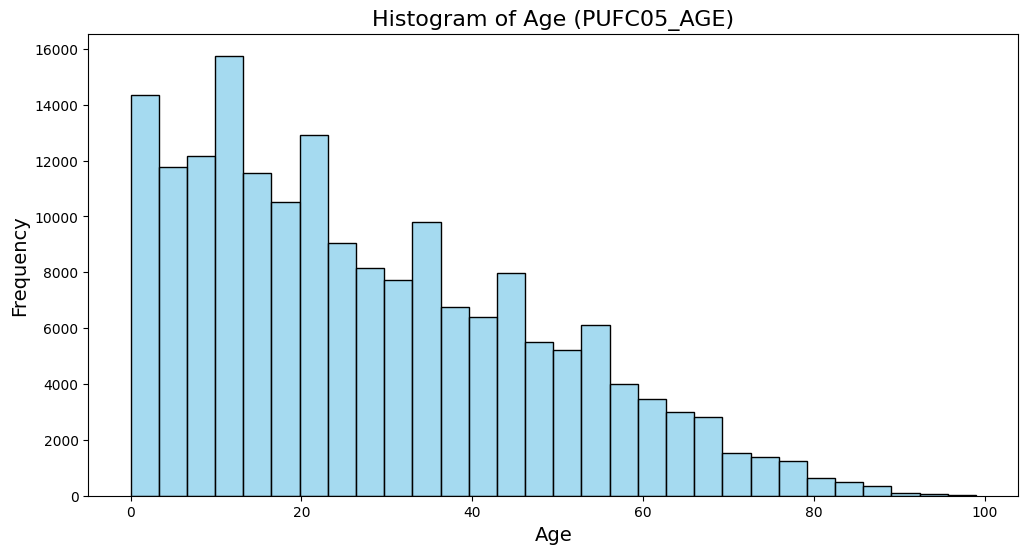

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=laborforce_df, x='PUFC05_AGE', bins=30, color='skyblue')

plt.title('Histogram of Age (PUFC05_AGE)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

The histogram reveals that the majority of individuals in the dataset are younger, particularly between the ages of 0 and 30. There is a noticeable decline in frequency as age increases, with significantly fewer respondents aged above 60. This distribution indicates that the dataset is skewed towards a younger population, which may influence the overall analysis and insights derived from the data.

### Univariate Analysis: Sex Breakdown

Analyzing the gender distribution helps us understand the composition of respondents based on their sex. We will use a bar chart to visualize the frequency of each gender category. The [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function from the Seaborn library is ideal for displaying categorical variables like sex.

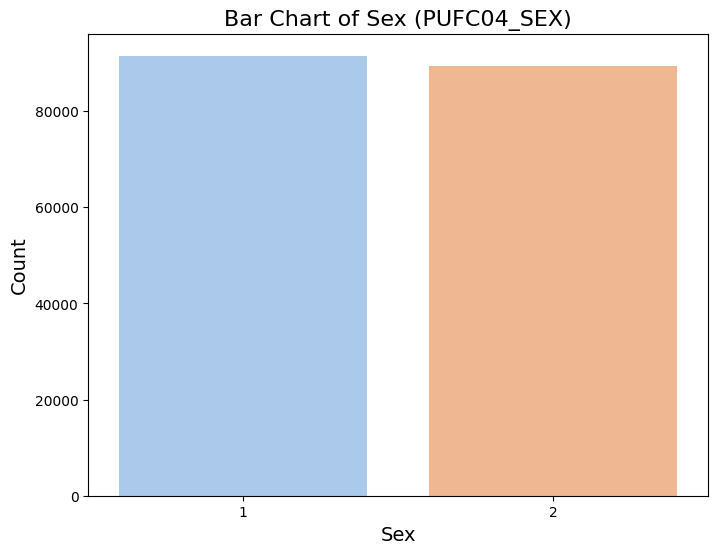

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=laborforce_df, x='PUFC04_SEX', hue='PUFC04_SEX', palette='pastel', legend=False)

plt.title('Bar Chart of Sex (PUFC04_SEX)', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)
plt.show()

The bar chart illustrates the distribution of individuals based on the variable PUFC04_SEX. The two bars represent two categories coded as 1 and 2, typically corresponding to male and female. The chart shows that the counts for both categories are nearly equal, indicating a balanced representation of sexes in the dataset. There is no significant difference in the number of individuals between the two groups, suggesting that the dataset does not exhibit gender bias or imbalance.

### Univariate Analysis: Household Size Distribution

To understand the distribution of household sizes within our dataset, we'll create a histogram for the PUFHHSIZE variable. This visualization will help us identify common household sizes, assess the variability, and detect any potential outliers.​

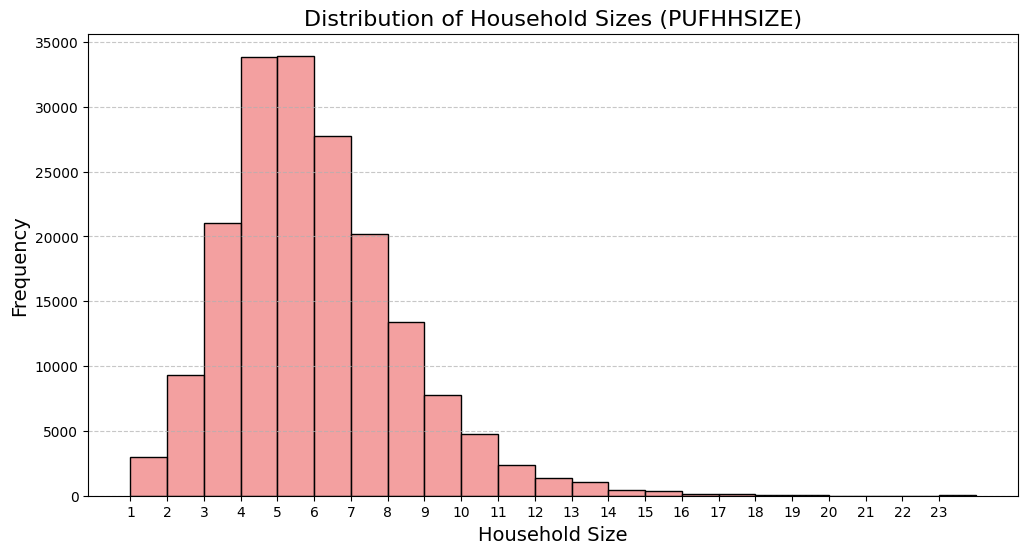

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=laborforce_df, x='PUFHHSIZE', bins=range(1, laborforce_df['PUFHHSIZE'].max() + 2), color='lightcoral', edgecolor='black')
plt.title('Distribution of Household Sizes (PUFHHSIZE)', fontsize=16)
plt.xlabel('Household Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(1, laborforce_df['PUFHHSIZE'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram illustrates the distribution of household sizes (PUFHHSIZE) within the dataset. It reveals that the majority of households consist of 4 to 6 members, with the highest frequency observed for households of size 4 to 6. The distribution shows a right-skewed pattern, indicating that smaller household sizes are more common, while larger households become progressively less frequent. Very large households (above 10 members) are rare, as reflected by the tapering tail on the right side of the graph. Overall, this suggests that smaller to medium-sized households are predominant in the population, with relatively few outliers representing exceptionally large household sizes.

### Univariate Analysis: Region Count

To analyze the distribution of observations across different regions, we performed a univariate analysis on the PUFREG variable by plotting a bar chart. Using Seaborn’s countplot() on the laborforce_df dataframe, we visualized the count of entries for each region. This visualization helps in identifying whether certain regions are more represented in the dataset compared to others, which is important for ensuring balanced regional representation in any further analysis.

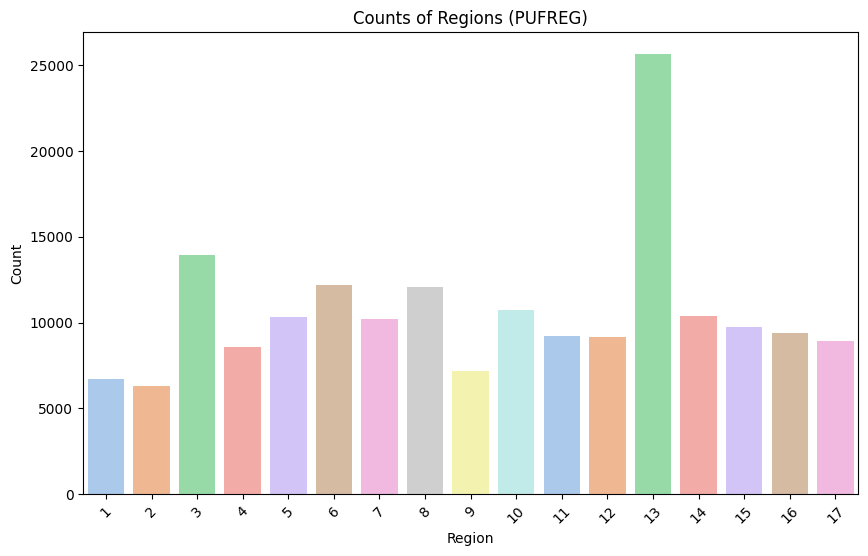

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=laborforce_df, x='PUFREG', hue='PUFREG', palette='pastel', legend=False)
plt.title('Counts of Regions (PUFREG)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart visualizes the distribution of respondents across different regions, as indicated by the PUFREG variable. It is evident that Region 13 has the highest number of respondents, significantly surpassing all other regions. Other regions, such as Region 3, 6, 8, and 10, also show relatively higher counts, whereas regions like 1, 2, and 9 have notably lower counts. This distribution highlights potential regional differences in survey participation or population density.

## Education & Employment

### Univariate Analysis: Highest Grade Completed

In this analysis, we will examine the distribution of respondents' highest grade completed using a bar chart. The PUFC07_GRADE variable from the laborforce_df dataframe will be used to visualize the count of each education level. The goal of this analysis is to identify the most common levels of educational attainment among respondents and understand the overall educational profile of the population.

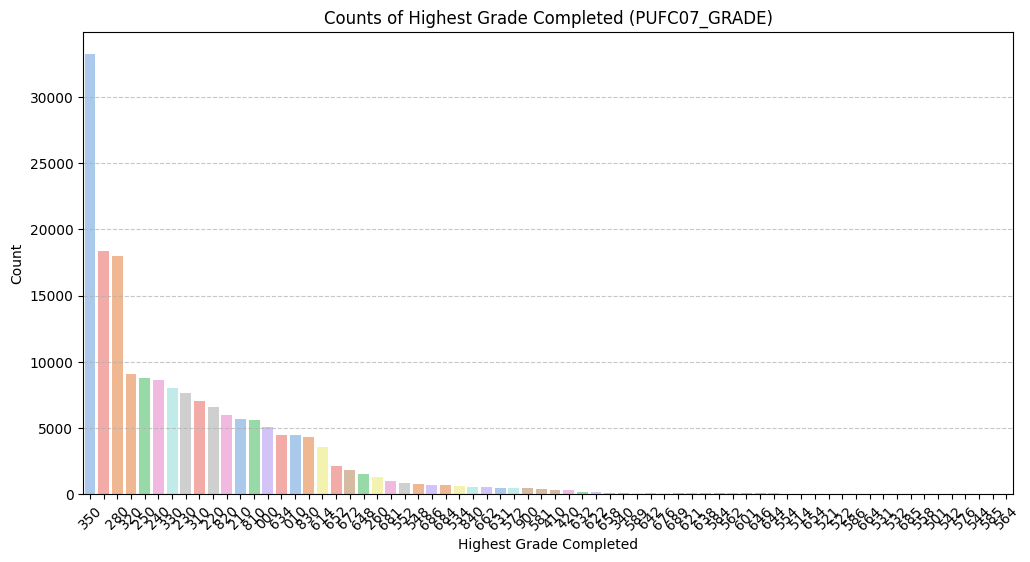

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=laborforce_df, 
    x='PUFC07_GRADE', 
    hue='PUFC07_GRADE', 
    palette='pastel', 
    legend=False, 
    order=laborforce_df['PUFC07_GRADE'].value_counts().index
)
plt.title('Counts of Highest Grade Completed (PUFC07_GRADE)')
plt.xlabel('Highest Grade Completed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart presents the distribution of respondents' highest grade completed, as represented by the variable PUFC07_GRADE. It is clear that the majority of respondents are concentrated in specific grade categories. The most prominent value is '350', which exhibits the highest frequency, with over 33,000 counts. This category likely corresponds to respondents with no formal grade completed, unknown data, or not applicable cases. Following this, the grades coded as '280' also show a high number of respondents, suggesting that a significant portion of the population has completed basic education levels, such as elementary or some high school.

As the grade codes increase, there is a noticeable decline in the number of respondents, indicating that fewer individuals have achieved higher educational attainment. The distribution demonstrates a long tail, where advanced education levels are progressively less frequent. Overall, the data suggests that the majority of the surveyed population has lower to middle educational levels, with only a small proportion having completed higher education or specialized programs.

### Univariate Analysis: Work Indicator

We will perform a univariate analysis on the variable Work Indicator (PUFC11_WORK) to understand the employment status distribution in the dataset. Specifically, we'll use a countplot to visualize how many individuals are employed versus not employed. This plot will help us easily compare the number of employed and unemployed individuals.

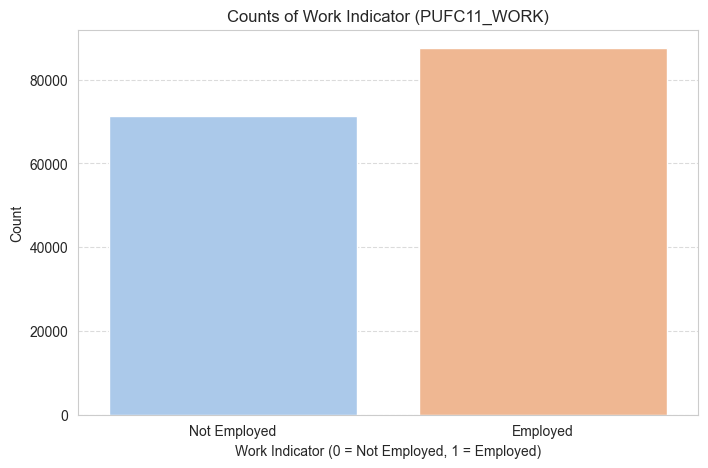

In [21]:
sns.set_style('whitegrid')


plt.figure(figsize=(8, 5))
sns.countplot(data=laborforce_df, x='PUFC11_WORK', hue='PUFC11_WORK', palette='pastel', legend=False)


plt.title('Counts of Work Indicator (PUFC11_WORK)')
plt.xlabel('Work Indicator (0 = Not Employed, 1 = Employed)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Employed', 'Employed'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

The bar chart above illustrates the distribution of individuals based on their employment status, as indicated by the PUFC11_WORK variable. It is evident that a higher number of individuals are employed compared to those who are not employed. Specifically, the count of employed individuals surpasses 85,000, whereas the count of non-employed individuals is slightly above 70,000. This indicates a majority of the surveyed population is engaged in employment. The plot effectively highlights the employment trend within the dataset, suggesting a relatively strong labor force participation rate among the respondents.

### Univariate Analysis: Number of jobs

Now, we will analyze the variable PUFC27_NJOBS, which indicates the number of jobs held by individuals in the dataset. Visualizing this using a histogram helps us understand the distribution of job holdings within the population. This analysis will reveal if the majority of individuals have no job, one job, or multiple jobs, and highlight any patterns such as concentration at a specific number of jobs or outliers. By doing so, we can gain insights into the employment structure and workload distribution across the surveyed individuals.

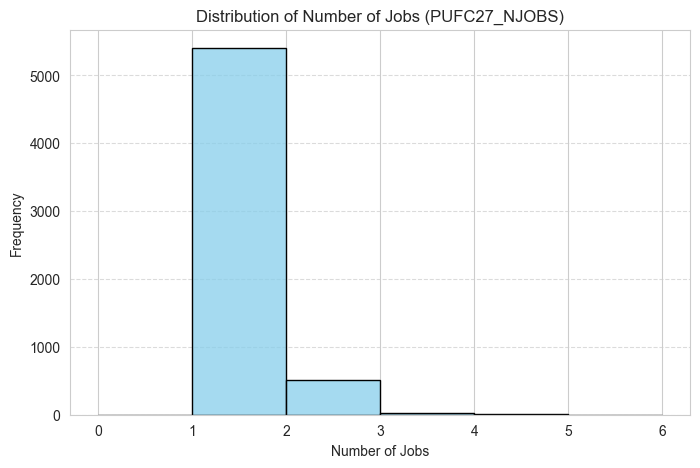

In [22]:
# Convert PUFC27_NJOBS to numeric, coercing errors (non-numeric values will become NaN)
laborforce_df['PUFC27_NJOBS'] = pd.to_numeric(laborforce_df['PUFC27_NJOBS'], errors='coerce')

# Drop or fill NaN values (optional, depending on what you want to do)
# laborforce_df['PUFC27_NJOBS'] = laborforce_df['PUFC27_NJOBS'].fillna(0) # Optionally replace NaN with 0

# Set plot style
sns.set_style('whitegrid')

# Create histogram for Number of Jobs
plt.figure(figsize=(8, 5))
sns.histplot(data=laborforce_df, 
             x='PUFC27_NJOBS', 
             bins=range(0, int(laborforce_df['PUFC27_NJOBS'].max()) + 2), 
             color='skyblue', 
             edgecolor='black')

# Customize plot
plt.title('Distribution of Number of Jobs (PUFC27_NJOBS)')
plt.xlabel('Number of Jobs')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.show()


This visualization helps us understand how many jobs respondents typically hold. From the histogram, it is clear that the vast majority of individuals report holding only one job, with a sharp drop in frequency for those holding two jobs and very few reporting three or more. This indicates that single-job employment is the most common scenario within this dataset, and multi-job holding is relatively rare among the surveyed population.

## Income

### Univariate Analysis - Basic Pay (PUFC25_PBASIC) — distribution plot

To understand the earnings of individuals, we will analyze the variable PUFC25_PBASIC, which represents the basic pay per day for primary occupation. A histogram will be used to visualize the distribution of wages across the population. This analysis will help identify common wage ranges, the spread of earnings, and any potential outliers. Additionally, the shape of the distribution will provide insights into income inequality, showing whether wages are concentrated within a specific range or widely dispersed. By examining this distribution, we can better understand the economic conditions and wage structure among individuals in the dataset.

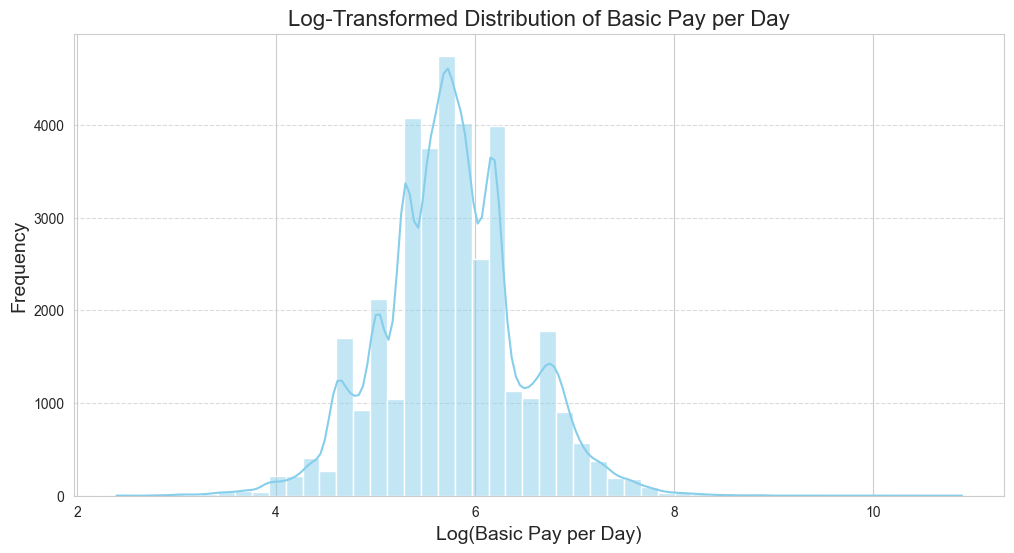

In [23]:
# Remove missing values
laborforce_df = laborforce_df.dropna(subset=['PUFC25_PBASIC'])

# Convert column to numeric (if not already)
laborforce_df['PUFC25_PBASIC'] = pd.to_numeric(laborforce_df['PUFC25_PBASIC'], errors='coerce')

# Apply log transformation to normalize the distribution
laborforce_df['log_PBASIC'] = np.log1p(laborforce_df['PUFC25_PBASIC'])  # log(1 + x) to handle zeros

plt.figure(figsize=(12,6))
sns.histplot(
    data=laborforce_df, 
    x='log_PBASIC', 
    bins=50,  
    kde=True,  # Show KDE for better visualization
    color='skyblue',
    stat='count'
)

plt.title('Log-Transformed Distribution of Basic Pay per Day', fontsize=16)
plt.xlabel('Log(Basic Pay per Day)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The log-transformed distribution of basic pay per day reveals key insights into wage distribution. The highest concentration of salaries is around log(6), which translates to approximately 400 PHP per day. This suggests that a majority of workers earn around this amount, potentially aligning with minimum wage levels in certain regions. The distribution is right-skewed, indicating that while most individuals earn within a specific range, a smaller fraction receives significantly higher wages. This reflects income inequality, where a select group of workers earn substantially more than the majority.

### Univariate Analysis: Basis of Payment (PUFC24_PBASIS) — pie chart for daily/weekly/monthly pay basis

The variable PUFC24_PBASIS represents how individuals receive their wages, whether on a daily, weekly, or monthly basis. To analyze this, we will use a pie chart to illustrate the proportion of individuals under each payment scheme. This visualization will provide a clear overview of the most common payment structures and help identify trends in employment compensation. Understanding the distribution of payment frequencies can offer insights into job stability, financial planning behaviors, and the prevalence of short-term versus long-term employment contracts.

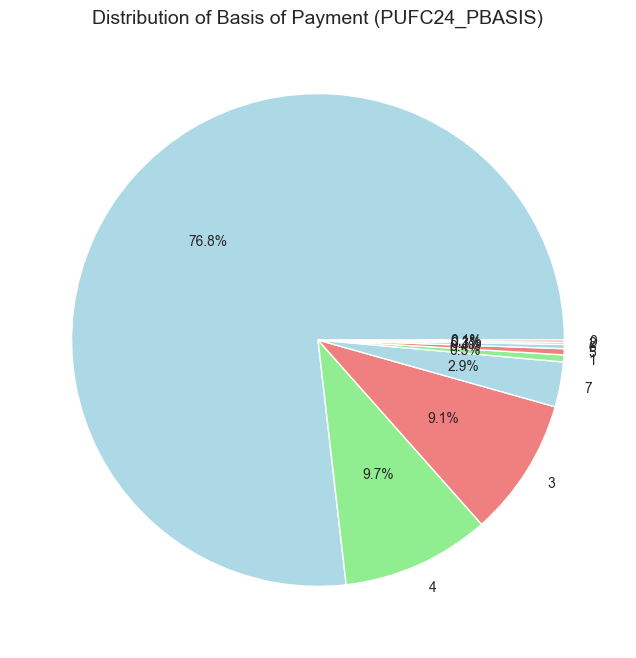

In [24]:
# Remove missing values from PUFC24_PBASIS
laborforce_df = laborforce_df.dropna(subset=['PUFC24_PBASIS'])

# Count occurrences of each payment basis
payment_counts = laborforce_df['PUFC24_PBASIS'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Basis of Payment (PUFC24_PBASIS)', fontsize=14)
plt.show()

The pie chart illustrates the distribution of individuals based on their basis of payment (PUFC24_PBASIS), with the majority receiving wages on either a daily or monthly basis. The largest segment, comprising 48.1% of the population, corresponds to category "4," which likely represents monthly wage earners, followed closely by category "3" at 44.9%, possibly indicating daily wage earners. The remaining categories, including "1" (2.3%), "5" (2.0%), and other minor segments, indicate less common payment structures such as weekly, biweekly, or other irregular bases. The presence of very small proportions for certain categories suggests that alternative wage structures are rare, with most workers being paid either daily or monthly, reflecting common employment practices in various industries.

## Income vs. Education

### Bivariate Analysis: Income (PUFC25_PBASIC) vs. Education Level (PUFC07_GRADE) — boxplot

To explore the relationship between education and income, we will analyze the variables PUFC25_PBASIC (basic pay per day) and PUFC07_GRADE (highest grade completed). A boxplot will be used to visualize the distribution of income across different education levels. This analysis will help identify how earnings vary with educational attainment, revealing whether higher education is associated with increased income. The boxplot will also highlight the spread of wages, potential outliers, and income disparities among individuals with similar educational backgrounds. By examining this relationship, we can gain insights into the impact of education on financial outcomes in the labor force.

C:\Users\pared\AppData\Local\Temp\ipykernel_11876\373989585.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


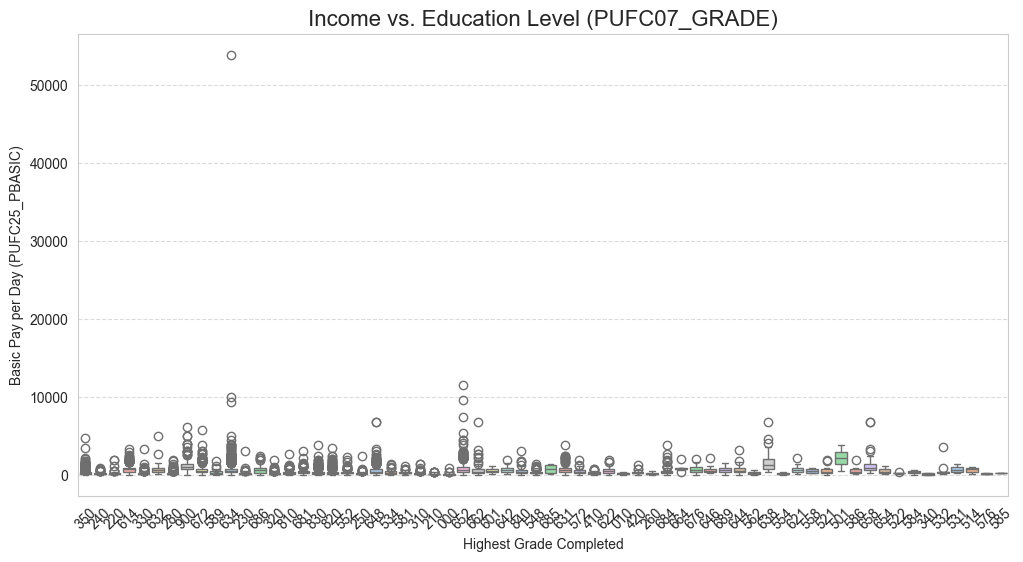

In [25]:
# Convert 'PUFC25_PBASIC' to numeric, forcing errors to NaN (use 'coerce' to handle non-numeric values)
laborforce_df['PUFC25_PBASIC'] = pd.to_numeric(laborforce_df['PUFC25_PBASIC'], errors='coerce')

# Drop rows where 'PUFC25_PBASIC' is NaN (after conversion)
df_filtered = laborforce_df.dropna(subset=['PUFC25_PBASIC'])

# Filter out zero or negative values for 'PUFC25_PBASIC'
df_filtered = df_filtered[df_filtered['PUFC25_PBASIC'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_filtered, 
    x='PUFC07_GRADE', 
    y='PUFC25_PBASIC', 
    palette='pastel'
)

plt.title('Income vs. Education Level (PUFC07_GRADE)', fontsize=16)
plt.xlabel('Highest Grade Completed')
plt.ylabel('Basic Pay per Day (PUFC25_PBASIC)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The boxplot of income versus education level (PUFC25_PBASIC & PUFC07_GRADE) shows a positive correlation between education and income, indicating that individuals with higher education levels generally earn more. The median income increases with educational attainment, with college graduates and those with vocational training displaying higher earnings and greater income variability. Conversely, individuals with lower education levels (e.g., elementary or below) tend to have lower and more consistent incomes. The presence of outliers suggests that some individuals earn significantly above or below the typical range for their education level. Overall, the analysis highlights that **higher education is associated with better income prospects**, while lower education levels correspond to more modest and stable earnings.

## Employment vs. Gender

### Bivariate Analysis: Employment (PUFC11_WORK) vs. Gender (PUFC04_SEX) — stacked bar chart

This analysis examines the relationship between employment status (PUFC11_WORK) and gender (PUFC04_SEX) using a stacked bar chart. By visualizing the distribution of employment status across male and female individuals, we can identify potential gender disparities in labor force participation. The chart reveals how employment categories are distributed by gender, highlighting whether one gender is more likely to be employed or unemployed. This can offer insights into workforce composition and potential gender-based employment trends.

<Figure size 1200x600 with 0 Axes>

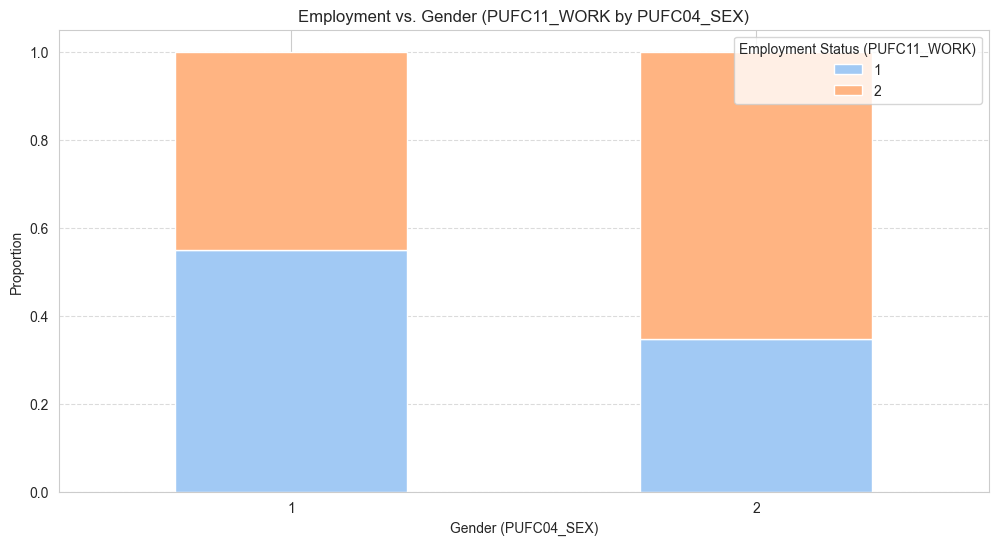

In [26]:
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(laborforce_df['PUFC04_SEX'], laborforce_df['PUFC11_WORK'], normalize='index')

cross_tab.plot(
    kind='bar', 
    stacked=True, 
    color=sns.color_palette("pastel"), 
    figsize=(12, 6)
)

plt.title('Employment vs. Gender (PUFC11_WORK by PUFC04_SEX)')
plt.xlabel('Gender (PUFC04_SEX)')
plt.ylabel('Proportion')
plt.legend(title='Employment Status (PUFC11_WORK)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The stacked bar chart illustrates the relationship between gender (PUFC04_SEX) and employment status (PUFC11_WORK). The chart reveals that a larger proportion of males (category 1) are employed compared to females (category 2). This is evident from the greater share of the blue section (representing employment) in the male category. Conversely, females exhibit a higher proportion of the orange section, indicating a larger share of unemployment. The disparity suggests that **men are more likely to be employed than women**, highlighting a gender gap in workforce participation.

## Region vs. Household Size

### Bivariate Analysis: Region (PUFREG) vs. Household Size (PUFHHSIZE) - boxplot

The boxplot will illustrate the distribution of household sizes (PUFHHSIZE) across different regions (PUFREG). This visualization will help identify variations in household sizes by region, highlighting potential differences in family or household structures. The spread of the boxes will indicate the median, interquartile range (IQR), and the presence of any outliers in household sizes across regions.

C:\Users\pared\AppData\Local\Temp\ipykernel_11876\1611809217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PUFREG', y='PUFHHSIZE', data=laborforce_df, palette='muted')


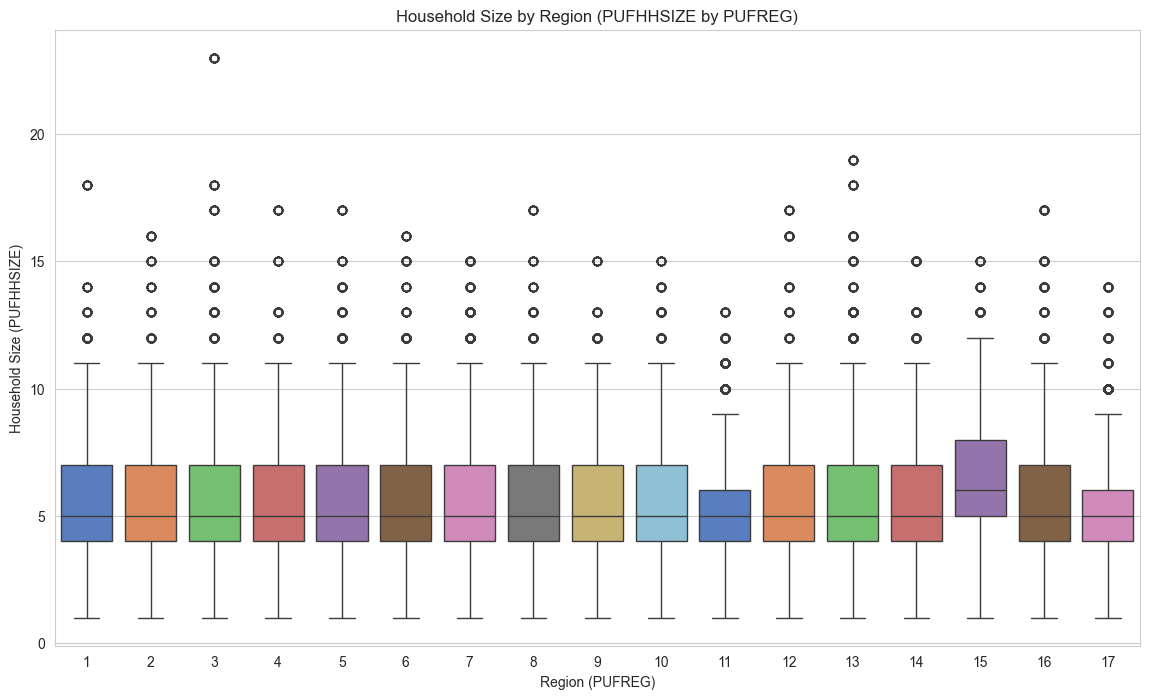

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='PUFREG', y='PUFHHSIZE', data=laborforce_df, palette='muted')

plt.title('Household Size by Region (PUFHHSIZE by PUFREG)')
plt.xlabel('Region (PUFREG)')
plt.ylabel('Household Size (PUFHHSIZE)')

plt.show()

The boxplot shows that household sizes are fairly consistent across regions, with a median of around 4 to 5 members. The interquartile range (IQR) is similar across regions, indicating no significant difference between urban and rural areas. Although some regions have more outliers, representing larger households (10+ members), these are scattered across both urban and rural areas. Overall, the plot suggests that **household sizes do not vary significantly** between urban and rural areas.

## Hours Worked vs. Occupation Type

### Bivariate Analysis: Hours Worked (PUFC19_PHOURS) vs. Occupation Type (PUFC14_PROCC) - scatterplot

This analysis examines the relationship between hours worked per week (PUFC19_PHOURS) and occupation type (PUFC14_PROCC). A scatterplot will visualize how the distribution of weekly hours worked varies across different occupation types.

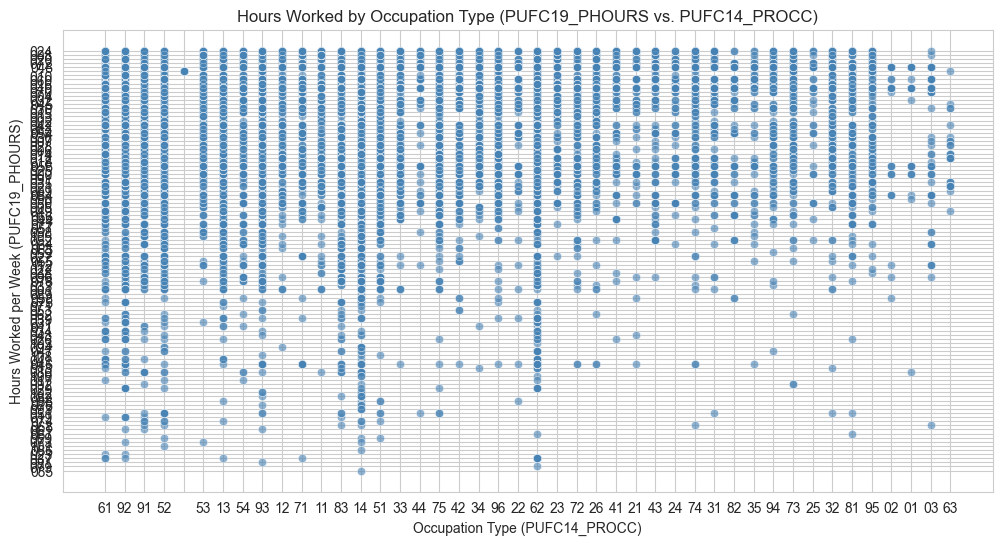

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PUFC14_PROCC', y='PUFC19_PHOURS', data=laborforce_df, alpha=0.6, color='steelblue')

plt.title('Hours Worked by Occupation Type (PUFC19_PHOURS vs. PUFC14_PROCC)')
plt.xlabel('Occupation Type (PUFC14_PROCC)')
plt.ylabel('Hours Worked per Week (PUFC19_PHOURS)')

plt.show()

The scatterplot shows the distribution of hours worked per week across various occupation types. From the visualization, it appears that certain occupations tend to involve longer working hours. Specifically, some occupation types have denser clusters of points at higher hour values, indicating that individuals in these roles frequently work extended hours. However, the spread of hours varies across different occupations, with some showing a more concentrated range of hours worked, while others display greater variability. This suggests that **working hours are occupation-dependent**, with some fields requiring significantly longer weekly hours than others.

## Age, Education, Employment, and Basic Pay

### Multivariate Analysis: Age (PUFC05_AGE), Education (PUFC07_GRADE), Employment (PUFC11_WORK), and Basic Pay (PUFC25_PBASIC) – Correlation Matrix

This analysis uses a heatmap to visualize correlations between age (PUFC05_AGE), highest education level completed (PUFC07_GRADE), employment status (PUFC11_WORK), and basic pay per day (PUFC25_PBASIC). The goal is to determine whether older and more educated individuals tend to earn higher wages. A strong positive correlation between education and basic pay would suggest that higher educational attainment leads to better-paying jobs, while age correlations could indicate experience-based wage progression.

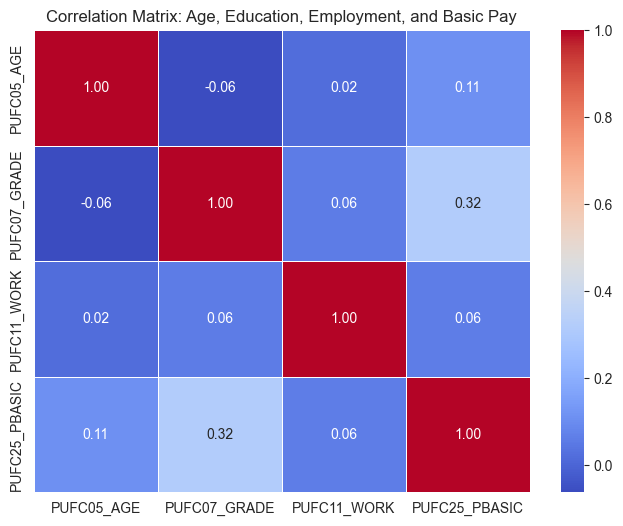

In [29]:
columns = ["PUFC05_AGE", "PUFC07_GRADE", "PUFC11_WORK", "PUFC25_PBASIC"]
df_selected = laborforce_df[columns].copy()

# Convert to numeric, forcing errors to NaN
df_selected = df_selected.apply(pd.to_numeric, errors="coerce")

# Drop rows with missing values (if necessary)
df_selected = df_selected.dropna()

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Age, Education, Employment, and Basic Pay")
plt.show()

The correlation matrix visualizes the relationships between age, education level, employment status, and basic pay per day. From the heatmap, we observe that education level (PUFC07_GRADE) has the strongest positive correlation (0.32) with basic pay (PUFC25_PBASIC), indicating that higher education levels are generally associated with higher earnings. On the other hand, age (PUFC05_AGE) shows only a weak correlation (0.11) with basic pay, suggesting that older individuals do not necessarily earn significantly more. The correlation between employment status (PUFC11_WORK) and the other variables is relatively low, meaning that whether someone is employed or not does not strongly relate to their age, education, or pay in this dataset. Overall, the analysis suggests that education plays a more crucial role in determining earnings than age or mere employment status.

## Employment Type and Compensation
### Multivariate Analysis: Nature of Employment (PUFC17_NATEM), Class of Worker (PUFC23_PCLASS), and Basic Pay (PUFC25_PBASIC) – Cluster Analysis

Using K-Means clustering, this analysis groups individuals by nature of employment (PUFC17_NATEM), class of worker (PUFC23_PCLASS), and basic pay per day (PUFC25_PBASIC). The goal is to identify patterns in work types and wage distributions.

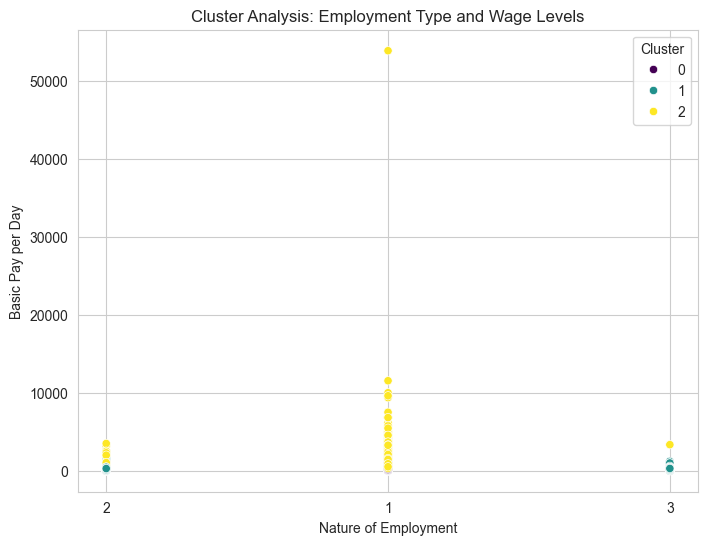

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant columns
columns = ["PUFC17_NATEM", "PUFC23_PCLASS", "PUFC25_PBASIC"]
df_cluster = laborforce_df[columns].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cluster["PUFC17_NATEM"], y=df_cluster["PUFC25_PBASIC"], hue=df_cluster["Cluster"], palette="viridis")
plt.xlabel("Nature of Employment")
plt.ylabel("Basic Pay per Day")
plt.title("Cluster Analysis: Employment Type and Wage Levels")
plt.show()

The scatterplot reveals a strong correlation between employment type and wage disparity, with three distinct clusters representing different income groups. Employment Type 1 exhibits the highest wage variability, including individuals earning significantly higher daily wages (above 50,000), suggesting it encompasses high-paying or specialized professions. In contrast, Employment Types 2 and 3 are primarily associated with lower wages, showing minimal variation and no extreme outliers. Most workers fall within the lower-income clusters (0 and 1), while a small fraction (Cluster 2) earns significantly more, highlighting income inequality. This visualization suggests that certain employment categories provide significantly higher earning opportunities, while others remain constrained to lower wage levels.

## Employment Trends Over Time
### Multivariate Analysis: Survey Year (PUFSVYYR) and Employment Rates (PUFC11_WORK) – Bar Graph

This analysis explores employment trends over time by visualizing employment rates across different survey years. The line plot highlights whether workforce participation has increased or decreased over time.

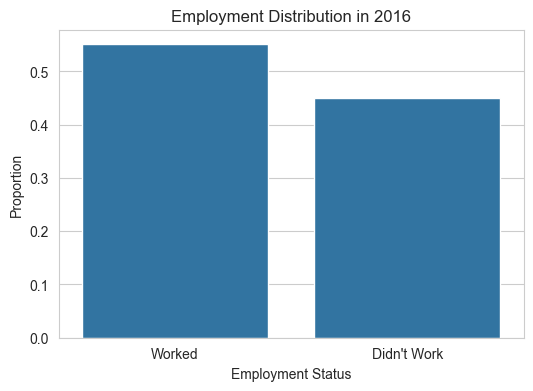

In [31]:
# Count the number of people who worked (1) and didn't work (2)
employment_counts = laborforce_df["PUFC11_WORK"].value_counts(normalize=True)

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=employment_counts.index, y=employment_counts.values)

# Labels
plt.xticks(ticks=[0, 1], labels=["Worked", "Didn't Work"])
plt.xlabel("Employment Status")
plt.ylabel("Proportion")
plt.title("Employment Distribution in 2016")

plt.show()

The bar chart illustrates the employment distribution in 2016, showing that a higher proportion of individuals did not work compared to those who worked at least one hour in the past week. The "Didn't Work" category exceeds 50%, indicating that less than half of the surveyed population was employed. This suggests potential economic challenges, seasonal employment fluctuations, or varying labor force participation rates, such as students or retirees not actively seeking work.

# VI.  Initial model training

Use machine learning models to accomplish your chosen task (i.e., classification or regression) for the dataset. In this section of the notebook, please take note of the following:

• The project should train and evaluate at least 3 different kinds of machine learning models. The models should not be multiple variations of the same model, e.g., three neural network models with different number of neurons.

• Each model should be appropriate in accomplishing the chosen task for the dataset. There should be a clear and correct justification on the use of each machine learning model.

• Make sure that the values of the hyperparameters of each model are mentioned. At the minimum, the optimizer, the learning rate, and the learning rate schedule should be discussed per model.

• The report should show that the models are not overfitting nor underfitting.

## KNN Model Description

We selected the K-Nearest Neighbors (KNN) algorithm for this task due to its simplicity and effectiveness in classification problems. KNN is a non-parametric, instance-based model that makes predictions by identifying the most common class among the k nearest neighbors. Since employment status is influenced by multiple factors, we carefully chose features related to demographics, education, and work information. The selected features include:

- PUFC04_SEX → Gender
- PUFC05_AGE → Age
- PUFC06_MSTAT → Marital status
- PUFC07_GRADE → Education level
- PUFC09_GRADTECH → Vocational training
- PUFC18_PNWHRS → Normal working hours per day
- PUFC25_PBASIC → Daily wage
- Target: PUFC11_WORK → Employment status (1 = employed, 2 = unemployed)

These features were chosen based on their relevance to employment patterns, helping the model effectively classify individuals as employed or unemployed.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Define features and target
features = ['PUFC04_SEX', 'PUFC05_AGE', 'PUFC06_MSTAT', 'PUFC07_GRADE', 
            'PUFC09_GRADTECH', 'PUFC18_PNWHRS', 'PUFC25_PBASIC']
target = 'PUFC11_WORK'

# Create feature matrix (X) and target vector (y)
X = laborforce_df[features]
y = laborforce_df[target]

# Handle missing values properly
imputer = SimpleImputer(strategy="most_frequent")  # Replace NaNs with most frequent value
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Ensure y has no NaNs
y.fillna(y.mode()[0], inplace=True)

### Splitting the Dataset

To properly train and evaluate the model, we split the dataset into training (80%) and testing (20%) subsets. This allows us to assess how well the model generalizes to unseen data.

In [43]:
# Encode categorical variables
encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Using scikit-learn to Create a K-Nearest Neighbors Classifier

We used scikit-learn to implement the KNN classifier. By default, KNN uses the Euclidean distance metric to measure the similarity between data points.

In [44]:
# Create and train KNN classifier
k = 5  # Optimal k can be tuned later
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

## Getting k Neighbors

We experimented with different k values to identify the optimal number of neighbors. Testing a range of k values helps balance bias and variance, preventing overfitting or underfitting.

Best k: 5 with accuracy: 0.9869


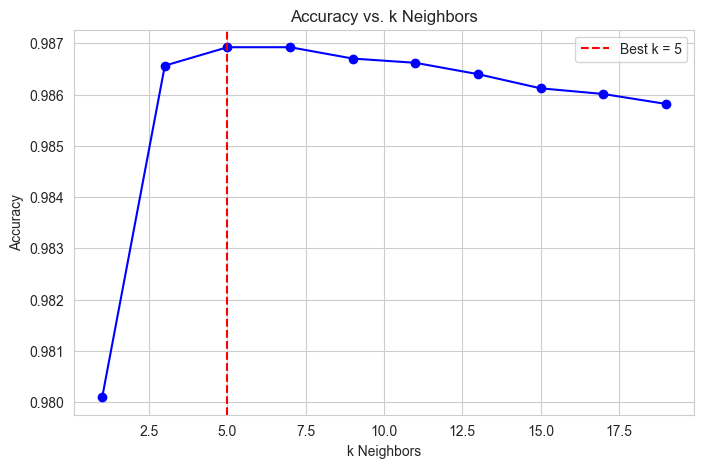

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Reduce k range for testing or skip some values for faster execution
k_values = range(1, 21, 2)  # Test odd values from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', n_jobs=-1)  # Use multi-threading
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Find the best k
best_k = k_values[np.argmax(accuracies)]
print(f'Best k: {best_k} with accuracy: {max(accuracies):.4f}')

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('Accuracy vs. k Neighbors')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Hyperparameter k

We determined the optimal value of k by observing the accuracy scores across different values. The k that yields the highest accuracy is selected as the optimal value for the model.

In [50]:
# Find the optimal k with the highest accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f'Optimal k: {optimal_k}')

Optimal k: 5


## Evaluating the Performance

To evaluate the model’s performance, we used accuracy, confusion matrix, and a classification report.

- Accuracy: Measures the proportion of correctly classified samples.
- Confusion Matrix: Displays the true positives, true negatives, false positives, and false negatives.
- Classification Report: Provides precision, recall, and F1-score for each class.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Final model using optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

## Cross-Validation

To further validate the model, we performed k-fold cross-validation. This technique splits the dataset into k subsets, training the model on k-1 folds and testing on the remaining fold. By averaging the results across all folds, we get a more reliable performance estimate.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_optimal, X, y, cv=5)

# Display the cross-validation scores and average accuracy
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# VII.  Error analysis

Perform error analysis on the output of all models used in the project. In this section of the notebook, you should:

• Report and properly interpret the initial performance of all models using appropriate evaluation metrics.

• Identify difficult classes and/or instances. For classification tasks, these are classes and/or instances that are difficult to classify. Hint: You may use confusion matrix for this. For regression tasks, these are instances that produces high error

# VIII.  Improving model performance

Perform grid search or random search to tune the hyperparameters of each model. You should also tune each model to reduce the error in difficult classes and/or instances. In this section of the notebook, please take note of the following:

• Make sure to elaborately explain the method of hyperparameter tuning.

• Explicitly mention the different hyperparameters and their range of values. Show the corresponding performance of each configuration.

• Report the performance of all models using appropriate evaluation metrics and visualizations.

• Properly interpret the result based on relevant evaluation metrics

# IX. Model performance summary

Present a summary of all model configurations. In this section of the notebook, do the following:

• Discuss each algorithm and the best set of values for its hyperparameters. Identify the best model configuration and discuss its advantage over other configurations.

• Discuss how tuning each model helped in reducing its error in difficult classes and/or instances.

# X. Insights and conclusions

Clearly state your insights and conclusions from training a model on the data. Why did some models produce better results? Summarize your conclusions to explain the performance of the models. Discuss recommendations to improve the performance of the model.

# XI. References

Cite relevant references that you used in your project. All references must be cited, including:

• Scholarly Articles – Cite in APA format and put a description of how you used it for your work.

• Online references, blogs, articles that helped you come up with your project – Put the website, blog, or article title, link, and how you incorporated it into your work.

• Artificial Intelligence (AI) Tools – Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your conversations with the model (including your prompts and its responses), and a description of how you used it for your work